# Measures of spread

In [100]:
#import warnings
#warnings.simplefilter('ignore')

Use the NumPy std() method to find the standard deviation:

In [96]:
import numpy 
speed = [1,2,3]
x = numpy.std(speed)
print(x)

0.816496580927726


Use the NumPy var() method to find the variance:

In [97]:
import numpy
speed = [1,2,3]
x = numpy.var(speed)
print(x)

0.6666666666666666


In [98]:
import math
math.sqrt(x)

0.816496580927726

In [1]:
import scipy
speed = [1,2,3,4,5]
x = scipy.std(speed)
print(x)

1.4142135623730951


C:\Users\BAUST CSE\AppData\Local\Temp\ipykernel_6744\183051169.py:3: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  x = scipy.std(speed)


In [26]:
print(scipy.__version__)

1.7.3


In [27]:
#pstdev() - Population standard deviation of data.
#pvariance() - Population variance of data.
#stdev() - Sample standard deviation of data.
#variance() -Sample variance of data.

In [2]:
from statistics import stdev,variance, pstdev, pvariance
data = [1,2,3]
print(stdev(data))
print(pstdev(data))
print(variance(data))
print(pvariance(data))

1.0
0.816496580927726
1
0.6666666666666666


In [ ]:
pstdev([1.5, 2.5, 2.5, 2.75, 3.25, 4.75])
pvariance(data)
mu = mean(data)
pvariance(data, mu) # if already mean is calculated
stdev([1.5, 2.5, 2.5, 2.75, 3.25, 4.75])
data = [2.75, 1.75, 1.25, 0.25, 0.5, 1.25, 3.5]
variance(data)

# Quartile

In [4]:
import numpy as np

values = [1,2,3,4,5,10]

x = np.quantile(values, [0,0.25,0.5,0.75,1])
x = np.quantile(values, [0.25,0.5,0.75])
#x = np.quantile(values)
print(x)
print(x[2])

[2.25 3.5  4.75]
4.75


In [6]:
from statistics import quantiles
#from statistics import percentile
l=[1,2,2,3,4,4,5]
print(quantiles(l))

[2.0, 3.0, 4.0]


# Percentile

In [7]:
l=[1,2,2,3,4,4,5]
Q1= np.percentile(l,25)
Q2= np.percentile(l,50)
Q3= np.percentile(l,75)
print(Q1, Q2, Q3)

2.0 3.0 4.0


# Statistics for relations between two inputs¶

These functions calculate statistics regarding relations between two inputs.

covariance() : Sample covariance for two variables.

correlation() : Pearson’s correlation coefficient for two variables.

linear_regression() : Slope and intercept for simple linear regression.

In [22]:
import pandas as pd
height=[5.6, 5.9, 6]
weight=[60, 65, 70]
df=pd.DataFrame({'h':height,'w':weight})
df

,h,w
0,5.6,60
1,5.9,55
2,6.0,50


In [23]:
import pandas as pd
print(df.corr())

          h         w
h  1.000000 -0.960769
w -0.960769  1.000000


In [24]:
import pandas as pd
print(df.cov())

          h     w
h  0.043333  -1.0
w -1.000000  25.0


In [16]:
import numpy as np
print(np.cov(height,weight))

[[4.33333333e-02 1.81666667e+00]
 [1.81666667e+00 7.63333333e+01]]


In [26]:
#from statistics import covariance
#import statistics.covariance
#print(covariance(height,weight))

In [27]:
def correlation(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    cor = numerator/denominator
    return cor

In [76]:
correlation(height, weight)

0.9988656650061858

In [29]:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

covariance(height, weight)

-1.0000000000000009

In [87]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [86]:
# calculate Pearson's correlation
corr, _ = pearsonr(height, weight)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation: %.3f' % _)

Pearsons correlation: 0.999
Pearsons correlation: 0.030


In [88]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'a':[1,3,4,6,8],
    'b':[2,3,5,6,8],
    'c':[6,5,4,3,2],
    'd':[5,4,3,4,6]
})
df

,a,b,c,d
0,1,2,6,5
1,3,3,5,4
2,4,5,4,3
3,6,6,3,4
4,8,8,2,6


<AxesSubplot:xlabel='variable', ylabel='value'>

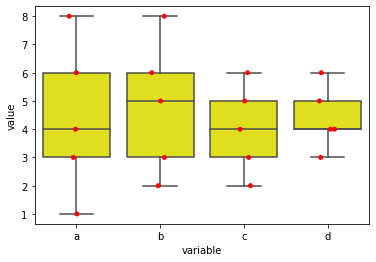

In [89]:
import seaborn as sns
g = sns.stripplot(data = df.melt(), 
                  x = 'variable', 
                  y = 'value', 
                  color = 'red')
sns.boxplot(data = df.melt(),
            x = 'variable', 
            y = 'value', 
            color = 'yellow')

In [93]:
x=[1,2,3,4]
y=[4,5,6,7]
cov_s=np.cov(x,y)[0][1]
cov_s

1.6666666666666665

In [94]:
cov_p=np.cov(x,y, bias=True)[0][1]
cov_p

1.25